<h1> Variazione numero pixel


In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import Interpolazione, final_val

from scipy.optimize import curve_fit
from scipy.stats import norm
import scipy.stats as stats

In [11]:
def step_f(x, x0, x1, C, A):
   """
   Funzione che calcola il valore di una funzione di Heaviside con gradino tra x0 e x1.
   Le code hanno solo il fondo C.

   Parametri:
   - x: array o valore scalare
   - x0: estremo inferiore del gradino
   - x1: estremo superiore del gradino
   - C: valore costante di offset (fondo)
   - A: ampiezza del gradino

   Ritorna:
   - Valore della funzione Heaviside
   """
   return np.where((x >= x0) & (x <= x1), C + A, C)

In [12]:
def read(file):    # funzione di lettura
    return np.loadtxt(file, skiprows = 1, unpack = True)

In [21]:
def fittiamo(x_data, y_data, p0 = [20, 80, 500, 2000]):    # funzione fit e ottimizzazione
    popt, pcov = curve_fit(step_f, x_data, y_data, p0)
    # amp_fit, mu_fit, sigma_fit, offset_fit = popt      giusto per capire cosa spara fuori popt
    return popt, pcov   

In [22]:
def plottiamo_plt(data):    # plot con pyplot
    x, y = data
    popt, pcov = fittiamo(*data)
    plt.plot(*data, label = "Dati con rumore", color = 'plum')
    plt.plot(x, step_f(x, *popt), label = "Fit Gaussiano", linestyle = '--', color = 'purple')
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"x0 = {popt[0]:.2f},  x1 = {popt[1]:.2f},  fondo = {popt[2]:.2f},  altezza = {popt[3]:.2f}")
    plt.show()
    return popt, pcov

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


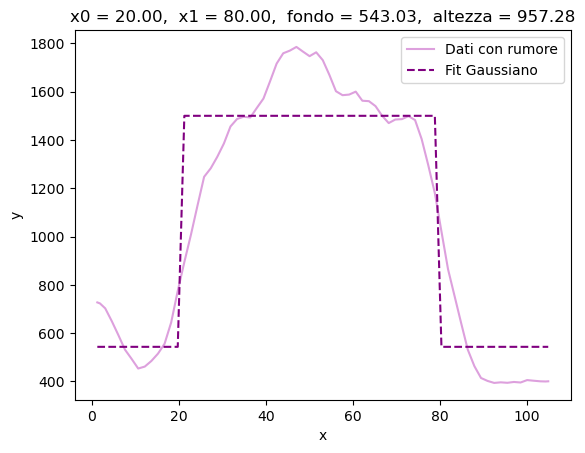

In [32]:
from scipy.ndimage import uniform_filter1d
data1 = np.array(read(f'pixel_0512.txt'))
profile_smoothed = uniform_filter1d(data1, size=5)


# Plot the data
popt1, pcov1 = plottiamo_plt(profile_smoothed)

In [24]:
# Calcolo dell'incertezza su x1 - x0
x0, x1 = popt1[0], popt1[1]
var_x0 = pcov1[0, 0]  # Varianza di x0
var_x1 = pcov1[1, 1]  # Varianza di x1
cov_x0_x1 = pcov1[0, 1]  # Covarianza tra x0 e x1

# Propagazione dell'errore
sigma_x1_minus_x0 = np.sqrt(var_x0 + var_x1 - 2 * cov_x0_x1)

# Risultato
delta_x = x1 - x0
print(f"x1 - x0 = {delta_x:.2f} ± {sigma_x1_minus_x0:.2f}")


x1 - x0 = 60.00 ± nan


/tmp/ipykernel_12334/1318597918.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  sigma_x1_minus_x0 = np.sqrt(var_x0 + var_x1 - 2 * cov_x0_x1)
